<a href="https://colab.research.google.com/github/avyukthinna/ML_Lab/blob/main/1BM22CS060_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

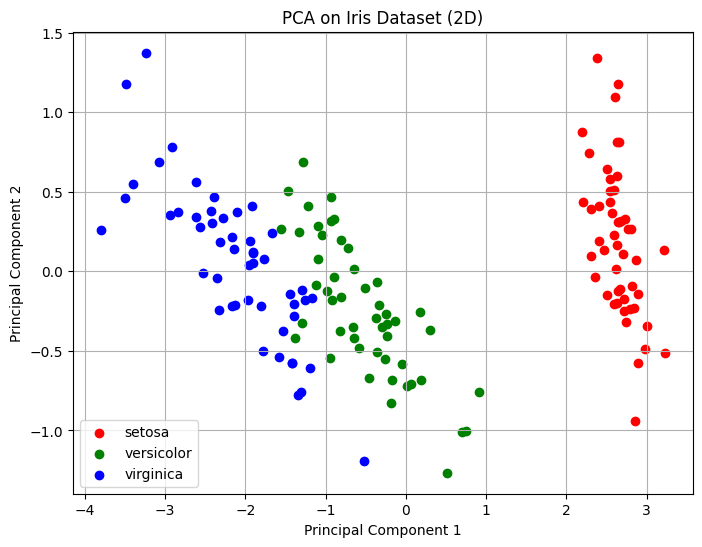

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov_matrix = np.cov(X, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        sorted_idx = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, sorted_idx[:self.n_components]]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# === Load Iris dataset ===
iris = load_iris()
X = iris.data  # shape: (150, 4)
y = iris.target  # 3 classes: 0, 1, 2

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# === Visualization ===
plt.figure(figsize=(8, 6))
for label, color, name in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=name, color=color)

plt.title('PCA on Iris Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()